
<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Miguel López Vélez <br>
Url: [Trabajo Práctico](https://github.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb)<br>
Problema:
> 1. Sesiones de doblaje <br>
> 2. Organizar los horarios de partidos de La Liga<br>
> 3. Combinar cifras y operaciones

Descripción del problema:

- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

$$
4+2-6/3*1 = 4
$$

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?



(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Inicialmente, debemos determinar las restricciones del problema, las cuales son las siguientes:
- No se pueden repetir los números
- No se pueden repetir los signos
- Se deben alternar los números y los signos
- Los resultados deben ser enteros

De esta forma la cantidad de posibilidades se limitan por el número de signos, ya que solo podemos usar 4 a la vez limita el uso de los números a 5, y estos al no poder repetirse lo vuelve un problema de permutación, porque el orden no importa:

$$
P_{9,5} = \frac{9!}{9!-5!} = 15120
$$

A esto se le debe multiplicar la cantidad de posibles combinaciones de signos sin repetir, lo cual es un problema de permutaciones de la forma:

$$
P_{4} = 4! = 24
$$

Dando como resultado un espacio de:

$$
15120 * 24 = 362880 posibilidades
$$

Ahora agregando la restricción de que el resultado debe ser un número entero, se debe analizar el rango de valores que se pueden obtener y evaluar si pertenecen o no al conjunto de enteros.


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)

Se puede implementar un diccionario para almacenar el valor de los resultados en la clave y que su valor sea una lista de expresiones que den como resultado dicho valor, facilitando la búsqueda de los valores enteros.

Respuesta

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?
Estableciendo
$$
N = \{1, 2, 3, 4, 5, 6, 7, 8, 9\}
$$

y

$$
O = \{+, -, *, /\}
$$

$$
f(N, O) = \{x \in \mathbb{Z} \ | \ \text{existe una combinación válida de } N \text{ y } O \text{ tal que } E(N, O) = x\}
$$
(*)¿Es un problema de maximización o minimización?

Ambos ya que debemos establecer el máximo y mínimo de la expresión dada.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

### Método # 1:

Mediante fuerza bruta por generación y eliminación de expresiones.

In [1]:

class Solution:
    def __init__(self, problem:str, operations:list):
        self.problem = list(problem)
        self.operations = operations
        self.rest_dict = {}
        self.result = []
        self.path = []
        self.used = set()
        self.used_op = []
        self.intentos = 0

    def backtrack(self):

        if len(self.path) == 9:
            path = "".join(self.path)
            result = eval(path)
            self.intentos += 1
            # print(path, result)
            if result.is_integer() and path not in self.result:
                self.result.append(path)
                if result not in self.rest_dict:
                    self.rest_dict[result] = [path]
                else:
                    self.rest_dict[result].append(path)
                return False


        if len(self.path) % 2 == 0:
            for num in self.problem:
                if num in self.used:
                    continue
                self.path.append(num)
                self.used.add(num)
                self.problem.remove(num)
                if self.backtrack():
                    return True
                self.path.remove(num)
                self.used.remove(num)
                self.problem.append(num)
        else:
            for op in self.operations:
                if op in self.used_op:
                    continue
                self.path.append(op)
                self.used_op.append(op)
                self.operations.remove(op)
                if self.backtrack():
                    return True
                self.path.remove(op)
                self.operations.append(op)
                self.used_op.remove(op)

        return False

    def find_values(self):
        self.backtrack()
        return self.result



a = '123456789'
operations = ['+', '-', '*', '/']


fuerza_bruta = Solution(a, operations)

a = fuerza_bruta.find_values()


In [2]:
def continuidad(res_dict):
    min_res = min(res_dict.keys())
    max_res = max(res_dict.keys())
    for i in range(int(min_res), int(max_res)+1):
        if i not in res_dict:
            return False, min_res, max_res
    return True, min_res, max_res

In [3]:

continuo, min_res, max_res = continuidad(fuerza_bruta.rest_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")


Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si


### Método # 2:

De una manera más eficiente podemos generar todas las posibles permutaciones del sistema de antemano y a coste de memoria se pueden calcular más rápido que el método anterior.

In [4]:
from itertools import permutations

res_dict = {}

def eval_expresssion(exp, res_dict):
    result = eval(exp)
    if result.is_integer():
        if result in res_dict:
            res_dict[result].append(exp)
        else:
            res_dict[result] = [exp]
    return res_dict

def get_expressions(res_dict):
    #Generamos las permutaciones de numeros
    for nums in permutations('123456789', 5):
        #Generamos las permutaciones de operaciones
        for ops in permutations('+-*/', 4):
            #Unimos los números y las operaciones, recordemos que se pone el número adicional al final
            expression = ''.join([f'{nums[i]}{ops[i]}' for i in range(4)]) + nums[4]
            #Se evalua el valor de la expresión
            res_dict = eval_expresssion(expression, res_dict)
    return res_dict

res_dict = get_expressions(res_dict)


In [5]:
continuo, min_res, max_res = continuidad(res_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")

Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

En este caso la complejidad es dada por el número de permutaciones de los números y las operaciones, si lo definimos como $m$ y $n$ respectivamente, y sabemos que la permutación esta definida como:

$$
P_{n,k} = \frac{n!}{(n-k)!}
$$

Si los valores de $n$ tienden a $\infty$ la complejidad del algoritmo es del orden factorial de $n$ o $m$, así es igual a $O(n!m!)$.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

### Aproximación # 1:

Solución por medio de ramificación y poda, con restricciones tanto para números enteros o que su mayor o menor valor de expresión no sea mayor a un valor ya encontrado.

En este caso se utiliza el backtracking con reglas específicas para determinar en estados iniciales si el numero no será entero, descartando algunos casos y en los casos donde exista la posibilidad de ser entero aplicando estos valores.




In [ ]:

from itertools import permutations

def evaluar_expresion(expresion):
    """Evalúa la expresión y retorna el resultado si es entero, None si no lo es."""
    try:
        resultado = eval(expresion)
        return int(resultado) if resultado == int(resultado) else None
    except ZeroDivisionError:
        return None  # Ignorar divisiones por cero

def dfs(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo."""
    if len(usados_numeros) == 9:  # Si ya usamos los 9 números
        if resultado_actual is not None:
            min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
            min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        return

    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            if nuevo_resultado is not None:  # Poda: Solo continuar si es entero
                dfs(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max)

def buscar_min_max():
    """Encuentra solo los valores mínimo y máximo posibles."""
    numeros = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max)

    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max()
print("Mínimo:", min_val)
print("Máximo:", max_val)


In [6]:
import random
test_ecu = random.sample(res_dict[max_res], 20)
min_test = random.sample(res_dict[min_res], 10)

other_test = random.sample(list(res_dict.keys()), 20)

other_test = [res_dict[a][0] for a in other_test]

other_test = [a[:i] for i in [3, 5, 7] for a in other_test]

test_ecu = [a[:i] for i in [3, 5, 7] for a in test_ecu]

min_test = [a[:i] for i in [3, 5, 7] for a in min_test]


In [7]:
import re
pattern = r"\d+/\d+"

def cost_func(path, numbers_available):
    total_path = ''.join(path)
    n_len = 10 - len(path)

    if len(path) % 2 == 1:
        current_val = eval(total_path)
        if isinstance(current_val, float):
            is_int = current_val.is_integer()
        else:
            is_int = True
        #Valoración alta en caso de que no sea entero y no sea posible corregirlo
        if not is_int and "*" in path and "/" in path:
            return float("-inf")
        #Valoración baja en caso de que no sea entero y sea posible corregirlo

        if "/" in path and not is_int:
            div = re.findall(pattern, total_path)[0]
            div = div.split("/")[1]
            poss_mult = [a for a in numbers_available if int(a) % int(div) == 0]
            if len(poss_mult) == 0:
                return float("-inf")

            poss_mult = sorted(poss_mult, reverse=True)

            return eval(total_path + "*" + poss_mult[0]) * n_len



        #Se valora si el numero es entero y cual es su posible mayor valor teniendo en cuenta los valores disponibles
        numbers_sorted = sorted(numbers_available)
        numbers_sorted_inv = sorted(numbers_available, reverse=True)
        if "-" not in path:
            return eval(total_path + "-" + numbers_sorted[0]) * n_len
        if "+" not in path:
            return eval(total_path + "+" + numbers_sorted_inv[0]) * n_len
        if "*" not in path:
            return eval(total_path + "*" + numbers_sorted_inv[0]) * n_len
        if "/" not in path:
            return eval(total_path + "/" + numbers_sorted[0]) * n_len

    else:
        cost_func(path[:-1], numbers_available)



numbers = '123456789'

max_paths = []
other_paths = []
min_paths = []

for i in test_ecu:
    max_paths.append(cost_func(list(i), [k for k in numbers if k not in i]))

for i in other_test:
    other_paths.append(cost_func(list(i), [k for k in numbers if k not in i]))

for i in min_test:
    min_paths.append(cost_func(list(i), [k for k in numbers if k not in i]))

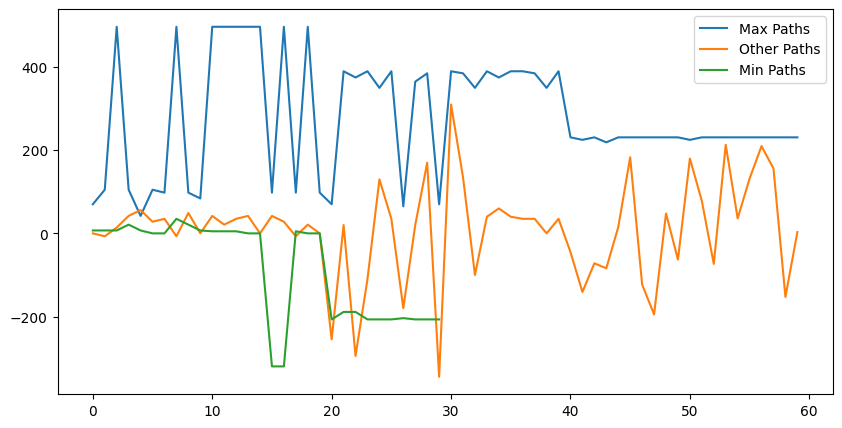

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(max_paths, label="Max Paths")
plt.plot(other_paths, label="Other Paths")
plt.plot(min_paths, label="Min Paths")
plt.legend()
plt.show()

In [44]:

class Solution:
    def __init__(self, problem:str, operations:list):
        self.problem = list(problem)
        self.operations = operations
        self.rest_dict = {}
        self.cache_data = set()
        self.result = []
        self.pattern = r"\d+/\d+"
        self.possible_mul = []
        self.path = []
        self.used = set()
        self.used_op = []
        self.intentos = 0

    def backtrack(self):

        if len(self.path) == 9:
            path = "".join(self.path)
            result = eval(path)
            self.intentos += 1
            # print(path, result)
            if result.is_integer() and path not in self.result:
                self.result.append(path)
                if result not in self.rest_dict:
                    self.rest_dict[result] = [path]
                else:
                    self.rest_dict[result].append(path)
                return True

        if len(self.path) % 2 == 1 and len(self.path) > 1:

            coste = self.cost_func(self.path, self.problem)
            print(coste, self.path)
            if coste < 34:
                return False


        if len(self.path) % 2 == 0:
            for num in self.problem:
                if num in self.used:
                    continue
                self.path.append(num)
                self.used.add(num)
                self.problem.remove(num)
                if self.backtrack():
                    return True
                self.path.remove(num)
                self.used.remove(num)
                self.problem.append(num)
        else:
            for op in self.operations:
                if op in self.used_op:
                    continue
                self.path.append(op)
                self.used_op.append(op)
                self.operations.remove(op)
                if self.backtrack():
                    return True
                self.path.remove(op)
                self.operations.append(op)
                self.used_op.remove(op)

        return False

    def cost_func(self, path, numbers_available):
        total_path = ''.join(path)
        n_len = 10 - len(path)

        if len(path) % 2 == 1:
            current_val = eval(total_path)
            if isinstance(current_val, float):
                is_int = current_val.is_integer()
            else:
                is_int = True
            #Valoración alta en caso de que no sea entero y no sea posible corregirlo
            if not is_int and "*" in path and "/" in path:
                return float("-inf")
            #Valoración baja en caso de que no sea entero y sea posible corregirlo

            if "/" in path and not is_int:
                div = re.findall(self.pattern, total_path)[0]
                div = div.split("/")[1]
                poss_mult = [a for a in numbers_available if int(a) % int(div) == 0]
                if len(poss_mult) == 0:
                    return float("-inf")

                poss_mult = sorted(poss_mult, reverse=True)

                return eval(total_path + "*" + poss_mult[0]) * n_len


            #Se valora si el numero es entero y cual es su posible mayor valor teniendo en cuenta los valores disponibles
            numbers_sorted = sorted(numbers_available)
            numbers_sorted_inv = sorted(numbers_available, reverse=True)
            if "-" not in path:
                return eval(total_path + "-" + numbers_sorted[0]) * n_len
            if "+" not in path:
                return eval(total_path + "+" + numbers_sorted_inv[0]) * n_len
            if "*" not in path:
                return eval(total_path + "*" + numbers_sorted_inv[0]) * n_len
            if "/" not in path:
                return eval(total_path + "/" + numbers_sorted[0]) * n_len

        else:
            cost_func(path[:-1], numbers_available)

    def find_values(self):
        self.backtrack()
        return self.result





a = '123456789'
operations = ['+', '-', '*', '/']


sol = Solution(a, operations)

a = sol.find_values()




0 ['1', '+', '2']
21 ['1', '+', '4']
35 ['1', '+', '6']
-100 ['1', '+', '6', '-', '3']
-280 ['1', '+', '6', '-', '7']
-325 ['1', '+', '6', '-', '9']
-145 ['1', '+', '6', '-', '4']
-280 ['1', '+', '6', '-', '7']
-145 ['1', '+', '6', '-', '4']
-145 ['1', '+', '6', '-', '4']
-inf ['1', '+', '6', '/', '5']
5.0 ['1', '+', '6', '/', '2']
-inf ['1', '+', '6', '/', '9']
65.0 ['1', '+', '6', '/', '4']
33.0 ['1', '+', '6', '/', '4', '*', '8']
-inf ['1', '+', '6', '/', '4', '*', '7']
3.0 ['1', '+', '6', '/', '4', '*', '2']
33.0 ['1', '+', '6', '/', '4', '*', '8']
3.0 ['1', '+', '6', '/', '4', '*', '2']
3.0 ['1', '+', '6', '/', '4', '*', '2']
-inf ['1', '+', '6', '/', '4', '*', '3']
-inf ['1', '+', '6', '/', '4', '*', '9']
33.0 ['1', '+', '6', '/', '4', '*', '8']
-inf ['1', '+', '6', '/', '4', '*', '3']
33.0 ['1', '+', '6', '/', '4', '*', '8']
33.0 ['1', '+', '6', '/', '4', '*', '8']
5.0 ['1', '+', '6', '/', '3']
65.0 ['1', '+', '6', '/', '4']
-112.5 ['1', '+', '6', '/', '4', '-', '5']
-40.5 ['1',

In [45]:
sol.rest_dict

{29.0: ['1+6*5-8/4']}

In [32]:
min(sol.rest_dict.keys()), max(sol.rest_dict.keys())

(-69.0, 77.0)

## Purga

In [ ]:

import re

class Solution:
    def __init__(self, problem:str, operations:list):
        self.problem = list(problem)
        self.operations = operations
        self.rest_dict = {}
        self.cache_data = set()
        self.result = []
        self.pattern = r"\d+/\d+"
        self.possible_mul = []
        self.path = []
        self.used = set()
        self.used_op = []
        self.intentos = 0

    def backtrack(self):

        # sanity = self.sanity_check()
        # if not sanity:
        #     return False

        if len(self.path) == 9:
            path = "".join(self.path)
            result = eval(path)
            self.intentos += 1
            # print(path, result)
            if result.is_integer() and path not in self.result:
                self.result.append(path)
                if result not in self.rest_dict:
                    self.rest_dict[result] = [path]
                else:
                    self.rest_dict[result].append(path)
                return True


        if len(self.path) % 2 == 0:
            for num in list(self.problem):
                if num in self.used:
                    continue
                self.path.append(num)
                self.used.add(num)
                self.problem.remove(num)
                if self.backtrack():
                    return True
                self.path.remove(num)
                self.used.remove(num)
                self.problem.append(num)
        else:
            for op in list(self.operations):
                if op in self.used_op:
                    continue
                self.path.append(op)
                self.used_op.append(op)
                self.operations.remove(op)
                if self.backtrack():
                    return True
                self.path.remove(op)
                self.operations.append(op)
                self.used_op.remove(op)

        return False


    def sanity_check(self):
        #Check para ver si es un entero y posee la división

        if len(self.path) == 9 and self.path in self.result:
            return False

        if len(self.path) == 0:
            return True

        if self.path[-1].isdigit() and "/" in self.path:
            if not eval("".join(self.path)).is_integer() and "*" in self.path and len(self.path) == 9:
                return False

            div = re.findall(self.pattern, ''.join(self.path))[0]
            div = div.split("/")[1]
            #Evaluamos los multiplos que vuelvan entero el resultado
            poss_mult = [a for a in self.problem if int(a) % int(div) == 0]

            if len(poss_mult) == 0:
                return False

            # #Procesamos los multiplos para obtener el resultado que no este guardado
            poss_mult = [str(a) for a in poss_mult]
            join_path = ''.join(self.path)
            poss_mult = [join_path + "*" + a for a in poss_mult]
            poss_mult = [a for a in poss_mult if a not in self.result]

            if len(poss_mult) == 0:
                return False


            return True

        if len(self.path) == 9 and eval("".join(self.path)) in self.rest_dict.keys():
            return False

        return True

    def find_values(self):
        self.backtrack()
        return self.result





a = '123456789'
operations = ['+', '-', '*', '/']


sol = Solution(a, operations)

a = sol.find_values()


(*)Calcula la complejidad del algoritmo

In [36]:
sol.intentos

362880

In [31]:
def duplicados(a):
    return len(set(a)) != len(a)

In [32]:
duplicados(sol.rest_dict[10.0])


False

In [19]:
a = sol.rest_dict.keys()
print(min(a), max(a))

-69.0 77.0




Respuesta

In [8]:
print(max(sol.rest_dict.keys()), min(sol.rest_dict.keys()))

77.0 -69.0


Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta